In [12]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [13]:
class Arm:

    def __init__(self, meanReturn, varianceReturn):
        self.meanReturn = meanReturn
        self.varianceReturn = varianceReturn
        
    #losujemy nagrode z maszyny
    def pull(self):
        award = self.meanReturn
        if self.varianceReturn > 0:
            award = normal(self.meanReturn, self.varianceReturn) 
            
        return award
    

In [14]:
class Bandit:

    def __init__(self, numberOfArms, armMean, variance):
        self.numberOfArms = numberOfArms
        self.armMean = armMean
        self.variance = variance
        self.arms = []
        self.arms.append(Arm(1, variance))
        for arm in range(numberOfArms-1):
            arm = Arm(0, variance)
            self.arms.append(arm)

    def reset(self):
        self.arms = []
        self.arms.append(Arm(1, self.variance))
        for arm in range(self.numberOfArms-1):
            arm = Arm(0, self.variance)
            self.arms.append(arm)

    def pull(self, armIndex):
        return self.arms[armIndex].pull()
    

In [15]:
class EpsilonGreedy:
    
    def __init__(self, bandit, alpha, eps):
        
        self.bandit = bandit
        self.numberOfArms = len(self.bandit.arms)
        self.Q = [0.0]*self.numberOfArms
        self.alpha = alpha
        self.eps = eps
        
    def learn(self, reward, armIndex):
        
        stepSize= self.alpha      
        self.Q[armIndex]+= stepSize*(reward - self.Q[armIndex])      
        
    def policy(self):
        armIndex = 0            
        explore_chance = random.random()
        #losowe przeglądanie innych opcji
        if (explore_chance < self.eps):
            armIndex = random.randint(0,self.numberOfArms-1) 
        else:
            armIndex= np.argmax(self.Q)

        return armIndex
    
    def reset(self):
        self.Q = [0.0]*self.numberOfArms


In [16]:
def testEpsilon(runs, pulls, eps, alpha):

    bandit = Bandit(10, 0, 1)
    eps_gready = EpsilonGreedy(bandit, eps, alpha)
    reward_array = [0.0] * pulls

    for run in range(runs):
        eps_gready.reset()
        if run % 100 == 0:
            print(f'Run number {run} for eps: {eps}')
        for pull in range(pulls):

            arm = eps_gready.policy()
            reward = bandit.pull(arm)
            eps_gready.learn(reward, arm)
            step_size = 1 / (run + 1)
            reward_array[pull] += step_size * (reward - reward_array[pull])
                
        bandit.reset()

    return reward_array

In [17]:
eps_values = [1/128,1/64,1/32,1/16, 1/8, 1/4]

In [18]:
rewards_list = []
for eps in eps_values:
    rewards = testEpsilon(runs = 5000,pulls = 1000, eps=eps, alpha=0.1)
    mean_reward = mean(rewards)
    rewards_list.append(mean_reward)

Run number 0 for eps: 0.0078125
Run number 100 for eps: 0.0078125
Run number 200 for eps: 0.0078125
Run number 300 for eps: 0.0078125
Run number 400 for eps: 0.0078125
Run number 500 for eps: 0.0078125
Run number 600 for eps: 0.0078125
Run number 700 for eps: 0.0078125
Run number 800 for eps: 0.0078125
Run number 900 for eps: 0.0078125
Run number 1000 for eps: 0.0078125
Run number 1100 for eps: 0.0078125
Run number 1200 for eps: 0.0078125
Run number 1300 for eps: 0.0078125
Run number 1400 for eps: 0.0078125
Run number 1500 for eps: 0.0078125
Run number 1600 for eps: 0.0078125
Run number 1700 for eps: 0.0078125
Run number 1800 for eps: 0.0078125
Run number 1900 for eps: 0.0078125
Run number 2000 for eps: 0.0078125
Run number 2100 for eps: 0.0078125
Run number 2200 for eps: 0.0078125
Run number 2300 for eps: 0.0078125
Run number 2400 for eps: 0.0078125
Run number 2500 for eps: 0.0078125
Run number 2600 for eps: 0.0078125
Run number 2700 for eps: 0.0078125
Run number 2800 for eps: 0.00781

In [19]:
rewards_list

[0.878654884729132,
 0.8859648301719725,
 0.8896974006077455,
 0.8941316696026531,
 0.8878282543263024,
 0.8128691233312347]

### Wykres

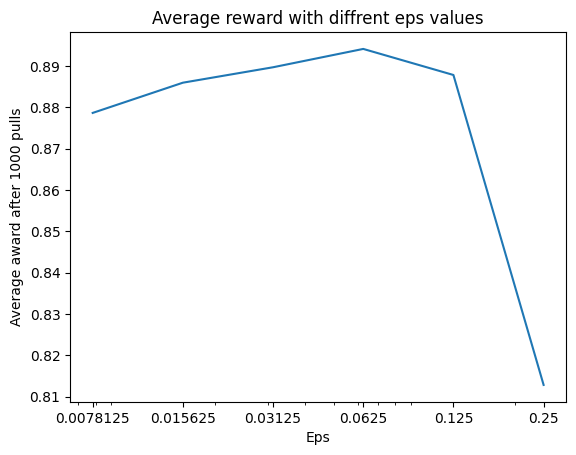

In [21]:
plt.figure()
plt.semilogx(eps_values, rewards_list)
plt.title('Average reward with diffrent eps values')
plt.xlabel('Eps')
plt.xticks(eps_values,eps_values)
plt.ylabel('Average award after 1000 pulls')
plt.show()